## Image Segmentation

Image segmentation is a process of dividing or partitioning an image into various parts called segments. Usually, there are regions in an image which have important information. By segmenting the image, one can identify important parts for processing the image.

### Part 1: Region-based Segmentation

One way to segment an image is to use the pixel intensity. One can give a threshold to the intensity. For example, one can define a single threshold value (i.e., global threshold) to distinguish between background and foreground.

In [1]:
# Import libraries
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

(192, 263, 3)


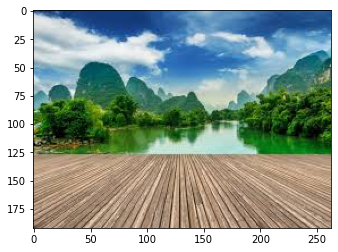

In [2]:
# This RGB image is used as an example.
image = plt.imread('images/1.jpeg')
print(image.shape)
plt.imshow(image)

(192, 263)


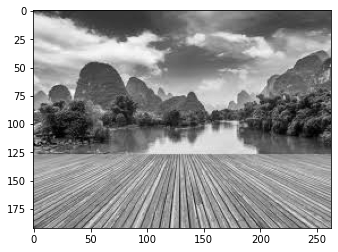

In [3]:
# Convert the RGB image to gray scale
from skimage.color import rgb2gray
gimage = rgb2gray(image)
print(gimage.shape)
plt.imshow(gimage, cmap='gray')

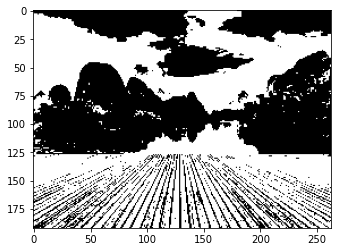

In [4]:
# Segmenting the image into two regions: background (blacker) and foreground (whiter).
gimage1 = rgb2gray(image)
gimage1_shape, gimage1_mean = gimage1.shape, gimage1.mean()
for i in range(gimage1_shape[0]):
    for j in range(gimage1_shape[1]):
        gimage1[i][j] = 1 if gimage1[i][j] > gimage1_mean else 0
plt.imshow(gimage1, cmap='gray')

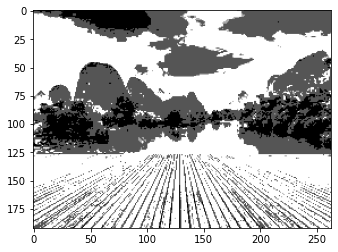

In [5]:
# Segmenting the image into more than two regions.
gimage2 = rgb2gray(image)
gimage2_shape, gimage2_mean = gimage2.shape, gimage2.mean()
for i in range(gimage2_shape[0]):
    for j in range(gimage2_shape[1]):
        if gimage2[i][j] > gimage2_mean:
            gimage2[i][j] = 3
        elif gimage2[i][j] < gimage2_mean and gimage2[i][j] > 0.5:
            gimage2[i][j] = 2
        elif gimage2[i][j] < 0.5 and gimage2[i][j] > 0.25:
            gimage2[i][j] = 1
        else:
            gimage2[i][j] = 0
plt.imshow(gimage2, cmap='gray')

### Part 2: Edge Detection

In between two regions, there is always an edge in between two adjacent regions with different pixel values. The edge can be considered as the discontinuous local features of an image. In order to detect the edges, filters and convolutions can be used.

Here're the steps of how it works:
1. Construct a weight matrix
2. Perform element-wise multiplication and get the output
3. Move the weight matrix as per the stride chosen
4. Convolve until all the pixels of the input are used

The weight matrix that detects edges is sobel operator:
1. Horizontal Sobel:
<br /> &nbsp;1   &nbsp;2   &nbsp;1
<br /> &nbsp;0   &nbsp;0   &nbsp;0
<br />-1  -2  -1
2. Vertical Sobel
<br />-1 &nbsp;0 &nbsp;1
<br />-2 &nbsp;0 &nbsp;2
<br />-1 &nbsp;0 &nbsp;1

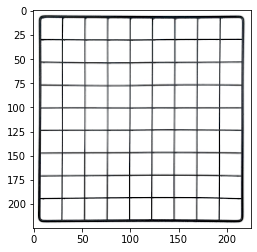

In [6]:
# This image is going to be used as an example for edge detection.
image = plt.imread('images/index.png')
plt.imshow(image)

In [7]:
gray_image = rgb2gray(image)
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])

<ipython-input-7-90bcecf97873>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray_image = rgb2gray(image)


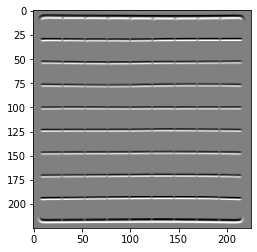

In [8]:
# Detecting horizontal part
out_h = ndimage.convolve(gray_image, sobel_horizontal, mode='reflect')
plt.imshow(out_h, cmap='gray')

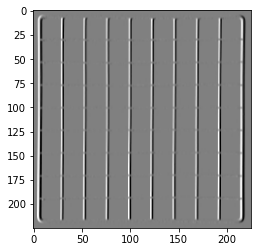

In [9]:
# Detecting vertical part
out_v = ndimage.convolve(gray_image, sobel_vertical, mode='reflect')
plt.imshow(out_v, cmap='gray')

Here is the Lapacian kernel that can detect both horizontal and vertical edges:
<br />1 &nbsp;&nbsp;1 &nbsp;1
<br />1 &nbsp;-8 &nbsp;1
<br />1 &nbsp;&nbsp;1 &nbsp;1

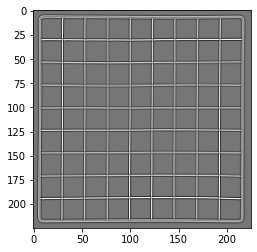

In [10]:
# Detecting horizontal and vertical parts using Laplacian kernel
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
out_l = ndimage.convolve(gray_image, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

### Part 3: Clustering

Here, k-means clustering will be used. k represents the number of clusters, and here is how it works:
1. Randomly select k initial clusters
2. Randomly assign each data point to one of the clusters
3. Calculate the centers of the clusters
4. Calculate the distance of all the points from the center of each cluster
5. Depending on the distance, the points are reasigned to the nearest cluster
6. Calculate the center of the newly formed cluster
7. Repeat steps (4), (5), and (6) until either the center of the clusters does not change or we reach the set number of iterations.

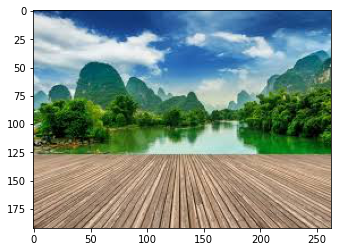

In [11]:
# Normalize the image between 0 to 1
image = plt.imread('images/1.jpeg')/255
plt.imshow(image)

In [12]:
# For k-means,the image is needed to be converted to 2D array.
image_ = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
image_.shape

(50496, 3)

In [13]:
# Fitting k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(image_)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

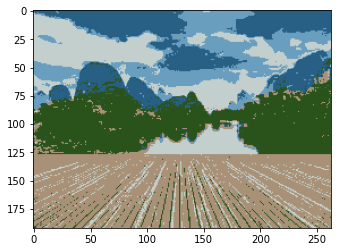

In [14]:
cluster_pic = pic2show.reshape(image.shape[0], image.shape[1], image.shape[2])
plt.imshow(cluster_pic)